## Import Libraries


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
# import streamlit as st


## Display setting


In [2]:
pd.set_option('display.max_columns', None)

## Data Overview

In [3]:
df=pd.read_csv('egypt_real_estate_listings.csv')
df

url       price  \
0      https://www.propertyfinder.eg/en/plp/buy/chale...   8,000,000   
1      https://www.propertyfinder.eg/en/plp/buy/villa...  25,000,000   
2      https://www.propertyfinder.eg/en/plp/buy/chale...  15,135,000   
3      https://www.propertyfinder.eg/en/plp/buy/apart...  12,652,000   
4      https://www.propertyfinder.eg/en/plp/buy/villa...  45,250,000   
...                                                  ...         ...   
19919  https://www.propertyfinder.eg/en/plp/buy/chale...  10,500,000   
19920  https://www.propertyfinder.eg/en/plp/buy/duple...  24,000,000   
19921  https://www.propertyfinder.eg/en/plp/buy/chale...   3,000,000   
19922  https://www.propertyfinder.eg/en/plp/buy/villa...   9,500,000   
19923  https://www.propertyfinder.eg/en/plp/buy/chale...   7,500,000   

                                             description  \
0      OWN A CHALET IN EL GOUNA WITH A PRIME LOCATION...   
1      For sale, a villa with immediate delivery in C...   
2      With a down payment of EGP 1,513,000, a fully ...   
3      Own an apartment in New Cairo with a minimal d...   
4      Project: Granville\nLocation: Fifth Settlement...   
...                                                  ...   
19919  Code: 2404\nChalet for sale in North Edge Towe...   
19920  Duplex for sale in Eastown -Sodic\n5th settlem...   
19921  Chalet for Sale in One of the Prime Projects o...   
19922  Villa for sale in installments in Sarai Compou...   
19923  Ground Chalet with Garden in Mountain View Nor...   

                                                location       type  \
0           Swan Lake Gouna, Al Gouna, Hurghada, Red Sea     Chalet   
1       Karmell, New Zayed City, Sheikh Zayed City, Giza      Villa   
2                  Azha North, Ras Al Hekma, North Coast     Chalet   
3      Taj City, 5th Settlement Compounds, The 5th Se...  Apartment   
4                     Granville, New Capital City, Cairo      Villa   
...                                                  ...        ...   
19919  North Edge Towers, New Alamein City, Al Alamei...     Chalet   
19920  Eastown, 5th Settlement Compounds, The 5th Set...     Duplex   
19921           White Sand, Markaz Al Hamam, North Coast     Chalet   
19922  Sarai, Mostakbal City Compounds, Mostakbal Cit...      Villa   
19923         Mountain View, Qesm Ad Dabaah, North Coast     Chalet   

                       size bedrooms bathrooms available_from payment_method  \
0         732 sqft / 68 sqm  1+ Maid         1    31 Aug 2025           Cash   
1      2,368 sqft / 220 sqm        4         4     2 Sep 2025           Cash   
2      1,270 sqft / 118 sqm        2         2    19 Aug 2025           Cash   
3      1,787 sqft / 166 sqm        3         2    26 Aug 2025   Installments   
4      4,306 sqft / 400 sqm        7         7     2 Sep 2025           Cash   
...                     ...      ...       ...            ...            ...   
19919  1,259 sqft / 117 sqm        2         2    21 Aug 2025           Cash   
19920  2,756 sqft / 256 sqm  3+ Maid         4     1 Sep 2025           Cash   
19921  1,195 sqft / 111 sqm        2         2    30 Jul 2025           Cash   
19922  2,573 sqft / 239 sqm        5         4    23 Aug 2025           Cash   
19923     990 sqft / 92 sqm        2         2    21 Aug 2025           Cash   

        down_payment  
0      1,200,000 EGP  
1      2,100,000 EGP  
2      1,513,000 EGP  
3      1,260,000 EGP  
4      2,262,500 EGP  
...              ...  
19919            NaN  
19920            NaN  
19921            NaN  
19922            NaN  
19923            NaN  

[19924 rows x 11 columns]

In [4]:
# Initial data check
print("Initial shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values pct:\n", (df.isnull().mean() * 100))

Initial shape: (19924, 11)

Data types:
 url               object
price             object
description       object
location          object
type              object
size              object
bedrooms          object
bathrooms         object
available_from    object
payment_method    object
down_payment      object
dtype: object

Missing values pct:
 url                0.000000
price              2.705280
description        0.391488
location           0.456736
type               0.386469
size               0.386469
bedrooms           0.722746
bathrooms          0.702670
available_from     3.327645
payment_method     2.715318
down_payment      72.671150
dtype: float64


## Data Cleaning – Standardization


In [5]:
# Standardize string columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()

In [6]:
# bathrooms Normalize numeric strings
print(f'bedroom unique values: {df['bathrooms'].unique()}\n')

df['bathrooms'] = df['bathrooms'].apply(
    lambda x: str(x).replace('+','') if isinstance(x, str) and '+' in x else x
)

print('*'*20 + 'after normlization' + '*'*20 )
print(f'\nbedroom unique values: {df['bathrooms'].unique()}')

bedroom unique values: ['1' '4' '2' '7' '5' '3' '6' '7+' nan 'none' '4.0' '2.0' '7.0' '3.0' '1.0'
 '5.0' '6.0']

********************after normlization********************

bedroom unique values: ['1' '4' '2' '7' '5' '3' '6' nan 'none' '4.0' '2.0' '7.0' '3.0' '1.0'
 '5.0' '6.0']


In [7]:
df['bedrooms'].unique()

array(['1+ maid', '4', '2', '3', '7', '5+ maid', '3+ maid', '2+ maid',
       '1', '4+ maid', '7+ maid', 'studio', '5', '6+ maid', nan,
       'studio+ maid', '7++ maid', '7+', '6'], dtype=object)

In [8]:
# split bedroom to => ['bedrooms_num', 'maid', 'studio']
def split_bedroom_info(x):
    if pd.isna(x):
        return pd.Series([np.nan, 0, 0])
    
    has_maid = 1 if 'maid' in x else 0
    
    is_studio = 1 if 'studio' in x else 0
    
    if is_studio:
        bedrooms_num = 0
    else:
        digits = ''.join([ch for ch in x if ch.isdigit()])
        bedrooms_num = int(digits) if digits else np.nan
    
    return pd.Series([bedrooms_num, has_maid, is_studio])

df[['bedrooms_num', 'maid', 'studio']] = df['bedrooms'].apply(split_bedroom_info)

In [9]:
# location split
df.dropna(subset=['location'], inplace=True)
def split_location(x):

    if pd.isna(x):
        return pd.Series([None, None, None , None])

    parts = [p.strip() for p in x.split(',')]
    if len(parts) == 1:
        return pd.Series([parts[0], None, None, None])
    elif len(parts) == 2:
        return pd.Series([parts[0], None, None, parts[-1]])
    else:
        return pd.Series([parts[0], ', '.join(parts[1:-2]), parts[-2] , parts[-1]]) 


df[['compound', 'district', 'city', 'governorate']] = df['location'].apply(split_location)


In [10]:
# cleaning price
df['price'] = df['price'].apply(
    lambda x: int(str(x).replace(',', '')) if pd.notna(x) else x
)

In [11]:
# size by sqm
df['size_sqm'] = df['size'].apply(
    lambda x: int(x.split('/')[1].strip().split(' ')[0].replace(',','')) if isinstance(x, str) and '/' in x else None
)

In [12]:
# Fix data types

df['bathrooms'] = df['bathrooms'].apply(lambda x: x if str(x).isdigit() else pd.NA)

df['bathrooms'] = df['bathrooms'].astype('Int64')

# ==============

df['available_from'] = pd.to_datetime(df['available_from'], errors='coerce')

C:\Users\Dell\AppData\Local\Temp\ipykernel_15472\3738539156.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['available_from'] = pd.to_datetime(df['available_from'], errors='coerce')


In [13]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [14]:
# drop unnecessary and missing coulmnes
df.drop(columns=['url','description','size','bedrooms','down_payment'],inplace=True)

In [15]:
# Initial data check again
print("Initial shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values pct:\n", (df.isnull().mean() * 100))

Initial shape: (19833, 14)

Data types:
 price                    float64
location                  object
type                      object
bathrooms                  Int64
available_from    datetime64[ns]
payment_method            object
bedrooms_num             float64
maid                     float64
studio                   float64
compound                  object
district                  object
city                      object
governorate               object
size_sqm                   int64
dtype: object

Missing values pct:
 price             2.258861
location          0.000000
type              0.000000
bathrooms         1.109262
available_from    2.884082
payment_method    2.268946
bedrooms_num      0.337821
maid              0.000000
studio            0.000000
compound          0.000000
district          2.566430
city              2.566430
governorate       0.000000
size_sqm          0.000000
dtype: float64


In [16]:
## Print summary statistics
df.describe().T

count                           mean                  min  \
price           19385.0                 16415306.81202             186900.0   
bathrooms       19613.0                       2.953194                  1.0   
available_from    19261  2025-08-21 09:40:40.807850240  2023-06-14 00:00:00   
bedrooms_num    19766.0                       2.975766                  0.0   
maid            19833.0                       0.470428                  0.0   
studio          19833.0                       0.016538                  0.0   
size_sqm        19833.0                    1034.914486                  1.0   

                                25%                  50%                  75%  \
price                     6000000.0           10345550.0           18169000.0   
bathrooms                       2.0                  3.0                  4.0   
available_from  2025-08-19 00:00:00  2025-08-31 00:00:00  2025-09-01 00:00:00   
bedrooms_num                    2.0                  3.0                  4.0   
maid                            0.0                  0.0                  1.0   
studio                          0.0                  0.0                  0.0   
size_sqm                      127.0                170.0                240.0   

                                max              std  
price                   840000000.0  23697908.137825  
bathrooms                       7.0         1.289974  
available_from  2027-10-31 00:00:00              NaN  
bedrooms_num                    7.0         1.171234  
maid                            1.0         0.499137  
studio                          1.0         0.127536  
size_sqm                 15811692.0    112296.602146

## Handling missing values

In [17]:
df.isnull().mean() * 100

price             2.258861
location          0.000000
type              0.000000
bathrooms         1.109262
available_from    2.884082
payment_method    2.268946
bedrooms_num      0.337821
maid              0.000000
studio            0.000000
compound          0.000000
district          2.566430
city              2.566430
governorate       0.000000
size_sqm          0.000000
dtype: float64

In [18]:
# drop not type
df.drop(df[df['type'].isin(['bungalow', 'bulk sale unit', 'land', 'whole building'])].index, inplace=True)


In [19]:
# handling bathrooms missing by mode every type
mode_bathrooms_values = df.groupby(['type'])['bathrooms'].apply(lambda x : x.mode().iloc[0])

def fill_na_bathrooms(data):
    
    if pd.isnull(data['bathrooms']):
        return mode_bathrooms_values.loc[data['type']]

    else :
        return data['bathrooms']
df['bathrooms']=df.apply(fill_na_bathrooms , axis = 1 )

In [20]:
# handling bedrooms missing by mode every type
mode_bedrooms_values = df.groupby(['type'])['bedrooms_num'].apply(lambda x : x.mode().iloc[0])

def fill_na_bathrooms(data):
    
    if pd.isnull(data['bedrooms_num']):
        return mode_bedrooms_values.loc[data['type']]

    else :
        return data['bedrooms_num']
df['bedrooms_num']=df.apply(fill_na_bathrooms , axis = 1 )

In [21]:
# handling payment_method missing by mode every compound
df['payment_method']=df['payment_method'].fillna(df['payment_method'].mode().iloc[0])

In [22]:
df.isnull().mean()*100

price             2.247874
location          0.000000
type              0.000000
bathrooms         0.000000
available_from    2.890846
payment_method    0.000000
bedrooms_num      0.000000
maid              0.000000
studio            0.000000
compound          0.000000
district          2.566829
city              2.566829
governorate       0.000000
size_sqm          0.000000
dtype: float64

In [23]:
df=df.dropna(axis=0)

In [24]:
df.isnull().mean()*100

price             0.0
location          0.0
type              0.0
bathrooms         0.0
available_from    0.0
payment_method    0.0
bedrooms_num      0.0
maid              0.0
studio            0.0
compound          0.0
district          0.0
city              0.0
governorate       0.0
size_sqm          0.0
dtype: float64

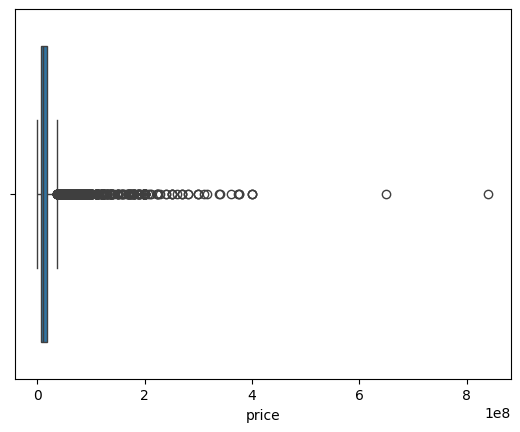

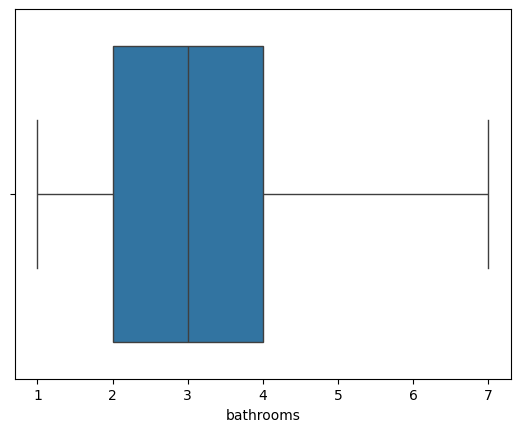

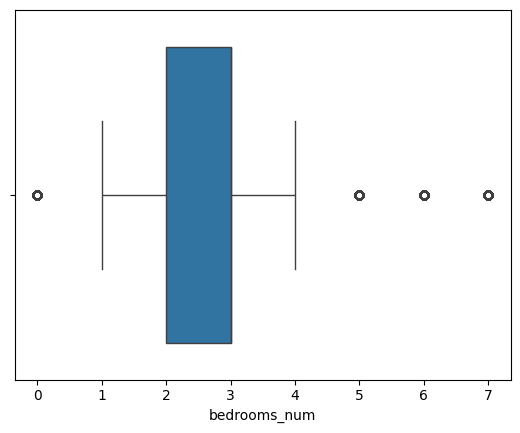

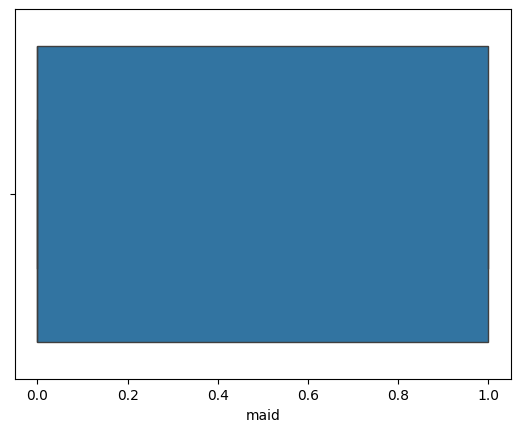

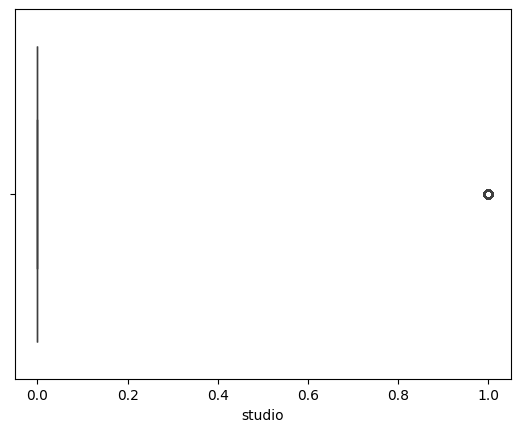

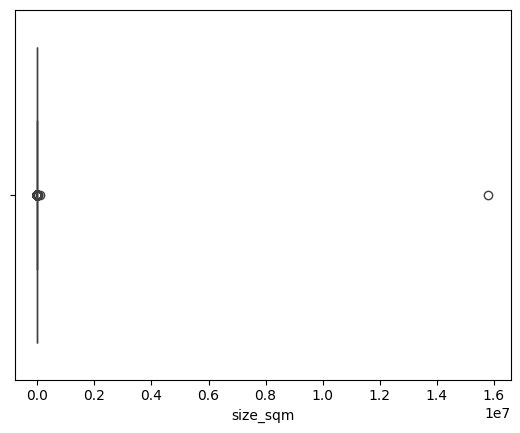

In [25]:
for col in df.select_dtypes('number').columns:
    plt.figure()
    sns.boxplot(df,x=col)

In [26]:
for col in df.select_dtypes('O').columns:
    print(f'{col} ==> {df[col].unique()}')
    print('====================================')

location ==> ['swan lake gouna, al gouna, hurghada, red sea'
 'karmell, new zayed city, sheikh zayed city, giza'
 'azha north, ras al hekma, north coast' ...
 'mohammed al maqref st., 6th zone, nasr city, cairo'
 'the waterway villas, ext north inves area, new cairo city, cairo'
 'white sand, markaz al hamam, north coast']
type ==> ['chalet' 'villa' 'apartment' 'penthouse' 'twin house' 'duplex'
 'townhouse' 'hotel apartment' 'cabin' 'ivilla' 'palace' 'full floor'
 'roof']
payment_method ==> ['cash' 'installments']
compound ==> ['swan lake gouna' 'karmell' 'azha north' ... 'mohammed al maqref st.'
 'the waterway villas' 'white sand']
district ==> ['al gouna' 'new zayed city' ''
 '5th settlement compounds, the 5th settlement' 'marina'
 'northern expansions' 'makadi' 'new heliopolis compounds'
 'south dahshur link' 'mostakbal city compounds' '6 october compounds'
 'soma bay, safaga' 'hurghada resorts'
 'cairo gate, sheikh zayed compounds' '26th of july corridor'
 '6th district' 'the 5th s

##### Handling Outlier

In [27]:
fig = px.scatter(
    df,
    x='size_sqm',
    y='price',
    labels={'size_sqm': 'Size (sqm)', 'price_million': 'Price (Million)'},
    title='Scatter Plot of Size vs Price'
).update_traces(
    hovertemplate='size_sqm=%{x:.0f}<extra></extra>'
)

fig.show()


In [28]:
df.drop(df[df['size_sqm']==15811692].index, inplace=True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_15472\2626466889.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:

fig = px.scatter(
    df,
    x='size_sqm',
    y='price',
    labels={'size_sqm': 'Size (sqm)', 'price_million': 'Price (Million)'},
    title='Scatter Plot of Size vs Price'
).update_traces(
    hovertemplate='size_sqm=%{x:.0f}<extra></extra>'
)

fig.show()


In [30]:
df.drop(df[df['size_sqm']==96106].index, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_15472\1571644431.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:

fig = px.scatter(
    df,
    x='size_sqm',
    y='price',
    labels={'size_sqm': 'Size (sqm)', 'price_million': 'Price (Million)'},
    title='Scatter Plot of Size vs Price'
).update_traces(
    hovertemplate='size_sqm=%{x:.0f}<extra></extra>'
)

fig.show()


In [32]:
df.drop(df[df['size_sqm']==6779].index, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_15472\50560321.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:

fig = px.scatter(
    df,
    x='size_sqm',
    y='price',
    labels={'size_sqm': 'Size (sqm)', 'price_million': 'Price (Million)'},
    title='Scatter Plot of Size vs Price',
).update_traces(
    hovertemplate='size_sqm=%{x:.0f}<extra></extra>'
)

fig.show()


## Feature Engineering

In [34]:
# Date Features
df['year'] = df['available_from'].dt.year.astype(str)
df['month'] = df['available_from'].dt.month
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str)
df['day'] = df['available_from'].dt.day.astype(str)
df['week_day'] = df['available_from'].dt.day_name()
df['month_name'] = df['available_from'].dt.month_name()
# Price Features
df['price_per_sqm'] = df['price'] / df['size_sqm']

C:\Users\Dell\AppData\Local\Temp\ipykernel_15472\796320407.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Dell\AppData\Local\Temp\ipykernel_15472\796320407.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Dell\AppData\Local\Temp\ipykernel_15472\796320407.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

# Business Question

### ============================Data Overview============================

In [35]:
htmap=df[df.select_dtypes('number').columns].corr()
px.imshow(htmap)

In [36]:
px.histogram(df, x="price_per_sqm", nbins=50, title="Distribution of Price per sqm")

In [37]:
px.scatter(
    df,
    x="district",
    y="price_per_sqm",
    opacity=0.6,
    title="Relationship Between Area and Price per sqm"
).update_xaxes(tickangle=45)


In [38]:
df['room_ratio'] = df['bedrooms_num'] / df['bathrooms']

fig = px.scatter(
    df,
    x="room_ratio",
    y="price",
    size="size_sqm",
    color="type",
    title="Room Ratio vs Price",
    labels={"room_ratio": "Room Ratio", "price": "Price"},
    hover_data=["bedrooms_num", "bathrooms", "size_sqm", "type"],
)

fig.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_15472\6793521.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### ============================Delivery Date=============================

In [39]:
tbl=df.groupby(['year']).size().reset_index(name="Number of units")

px.bar(
    tbl,
    x="year",
    y="Number of units",
    title="Delivery Units Supply Trend per Year",
    text_auto=True,
       )


In [40]:
px.line(df.groupby("year")["size_sqm"].mean().reset_index(),
        x="year", y="size_sqm",
        title="Average Unit Size by Delivery Year")

In [41]:
df_month = df.groupby(["month_name",'month'])["price_per_sqm"].mean().reset_index()
df_month_sorted = df_month.sort_values("month")

px.line(df_month_sorted,
        x="month_name", y="price_per_sqm",
        title="Monthly Price per SQM Pattern Across All Years")


### ======================Type========================

In [42]:
tbl=df.groupby(["type",'maid'])["price_per_sqm"].mean().reset_index()
tbl['maid']=tbl['maid'].apply(lambda x: "Yes" if x == 1 else 'No')
px.bar(tbl,
       x="type", y="price_per_sqm",color='maid',barmode='group',
       text_auto=True).update_xaxes(tickangle=45)

In [43]:
tbl=df.groupby(["type",'maid'])["size_sqm"].mean().reset_index()
tbl['maid']=tbl['maid'].apply(lambda x: "Yes" if x == 1 else 'No')
px.bar(tbl,x='type',y='size_sqm',color='maid',barmode='group',
       text_auto=True).update_xaxes(tickangle=45)

In [44]:
tbl = df.groupby(['year','type']).size().reset_index(name="Number of units")

px.scatter(
    tbl,
    x="type",
    y="year",
    size="Number of units",
    color="year",
    text="Number of units",
    title="Delivery Units Supply Trend per Year",
    size_max=60
)


In [45]:
px.pie(df, names="type",
       title="Unit Type Distribution (Market Demand)",height=500,width=1000)


### ============================Location============================

In [46]:
top_20_compound=df.groupby("compound")["size_sqm"].mean().reset_index().sort_values(by='size_sqm',ascending=False).head(20)
px.bar(
    top_20_compound,
    x='compound',
    y='size_sqm',
    text_auto=True,
    title='The 20 largest compound by size sqm',
    )

In [47]:
city_stats = (
    df.groupby("city")
    .agg(
        avg_price_per_sqm=('price_per_sqm','mean'),
        supply=('city','size')
    )
    .reset_index()
)

top10 = city_stats.sort_values(by="avg_price_per_sqm", ascending=False).head(10)
top10["category"] = "Top Cities"

bottom10 = city_stats.sort_values(by="avg_price_per_sqm", ascending=True).head(10)
bottom10["category"] = "Bottom Cities"

combined = pd.concat([top10, bottom10], axis=0)

px.sunburst(
    combined,
    path=["category", "city"],
    values="avg_price_per_sqm",
    color="supply",
    title="Sunburst — Top 10 & Bottom 10 Cities by Avg Price per SQM (with Supply)",
    color_continuous_scale="Viridis"
)


In [48]:
tbl = df.groupby("city").size().reset_index(name="supply")

price_tbl = df.groupby("city")["price_per_sqm"].mean().reset_index(name="avg_price_per_sqm")

final = tbl.merge(price_tbl, on="city")

final = final.sort_values(by="supply", ascending=False)

px.bar(
    final.sort_values(by="supply", ascending=True).tail(10),
    x="supply",
    y="city",
    text="avg_price_per_sqm",
    title="Top Cities by Supply (Number of Listings)",
)


In [49]:
# ---------------------------------------------------------
# 1) أعلى 10 مدن حسب متوسط سعر المتر
# ---------------------------------------------------------
top_cities = (
    df.groupby("city")["price_per_sqm"]
    .mean()
    .reset_index()
    .sort_values(by="price_per_sqm", ascending=False)
    .head(10)
)

top_city_list = top_cities["city"].tolist()


# ---------------------------------------------------------
# 2) فلترة الداتا على المدن العشرة فقط
# ---------------------------------------------------------
df_filtered = df[df["city"].isin(top_city_list)]


# ---------------------------------------------------------
# 3) حساب متوسط سعر المتر لكل كومباوند داخل كل مدينة
# ---------------------------------------------------------
compound_tbl = (
    df_filtered.groupby(["city", "compound"])["price_per_sqm"]
    .mean()
    .reset_index()
    .sort_values(by="price_per_sqm", ascending=False)
)


# ---------------------------------------------------------
# 4) أخذ أول 10 كومباوندات داخل كل مدينة
# ---------------------------------------------------------
top_10_compounds_per_city = (
    compound_tbl.groupby("city")
    .head(10)
    .reset_index(drop=True)
)


# ---------------------------------------------------------
# 5) رسم Treemap 
# ---------------------------------------------------------
px.treemap(
    top_10_compounds_per_city,
    path=["city", "compound"],
    values="price_per_sqm",
    color="price_per_sqm",
    title="Top 10 Compounds Within Top 10 Cities (By Avg Price per SQM)",
    color_continuous_scale="Viridis"
)


In [50]:
city_avg = df.groupby("city")["price_per_sqm"].mean().reset_index()

top10_cities = city_avg.sort_values(by="price_per_sqm", ascending=False).head(10)
top10_city_list = top10_cities["city"].tolist()

pivot_type = df[df["city"].isin(top10_city_list)].pivot_table(
    index="city",
    columns="type",
    values="price_per_sqm",
    aggfunc="mean"
).reset_index()

px.bar(
    pivot_type,
    x="city",
    y=[col for col in pivot_type.columns if col != "city"],
    barmode="group",
    title="Price per sqm by Unit Type Inside Top 10 Cities"
)

In [51]:
df.isnull().mean()*100

price             0.0
location          0.0
type              0.0
bathrooms         0.0
available_from    0.0
payment_method    0.0
bedrooms_num      0.0
maid              0.0
studio            0.0
compound          0.0
district          0.0
city              0.0
governorate       0.0
size_sqm          0.0
year              0.0
month             0.0
year_month        0.0
day               0.0
week_day          0.0
month_name        0.0
price_per_sqm     0.0
room_ratio        0.0
dtype: float64

In [52]:
df.to_csv('end EDA.csv',index=False)

## streamlit application

In [1]:
%%writefile Real_State_Dashboard.py

# Import Helper Libraries 
import streamlit as st
import pandas as pd 
import plotly.express as px 

# Page Config
st.set_page_config(layout='wide', page_title="Real State Analysis")


# -------------------------------
# CUSTOM CSS — FULL WIDTH + CENTER
# -------------------------------
st.markdown("""
<style>

/* Title فقط (st.title) باللون الأحمر الخاص بـ Plotly */
h1 {
    color: #EF553B !important;   /* Red-Orange used by Plotly */
    text-align: center !important;
}

/* باقي التنسيقات */
.block-container {
    width: 100% !important;
    max-width: 100% !important;
    padding-left: 4rem !important;
    padding-right: 4rem !important;
}

p {
    text-align: center !important;
}

[data-testid="metric-container"] {
    text-align: center !important;
    margin: auto !important;
}

.stPlotlyChart {
    margin: auto !important;
}

.css-1kyxreq, .element-container {
    margin-left: auto !important;
    margin-right: auto !important;
}

</style>
""", unsafe_allow_html=True)




# -------------------------
# READ DATA
# -------------------------
data = pd.read_csv("end EDA.csv")


# -------------------------------
# NUMBER FORMATTER (K / M)
# -------------------------------
def format_number(num):
    """Convert large numbers into K/M format."""
    if num >= 1_000_000:
        return f"{num/1_000_000:.1f}M"
    elif num >= 1_000:
        return f"{num/1_000:.1f}K"
    else:
        return f"{num:.0f}"


# Sidebar filter
typee = st.sidebar.multiselect('Filter By Type', options=data['type'].unique())
typee = data['type'].unique() if typee == [] else typee

bedrooms_num = st.sidebar.multiselect('Filter By Bedrooms', options=data['bedrooms_num'].unique())
bedrooms_num = data['bedrooms_num'].unique() if bedrooms_num == [] else bedrooms_num

bathrooms = st.sidebar.multiselect('Filter By Bathrooms', options=data['bathrooms'].unique())
bathrooms = data['bathrooms'].unique() if bathrooms == [] else bathrooms

city = st.sidebar.multiselect('Filter By City', options=data['city'].unique())
city = data['city'].unique() if city == [] else city

compound = st.sidebar.multiselect('Filter By Compound', options=data['compound'].unique())
compound = data['compound'].unique() if compound == [] else compound

year = st.sidebar.multiselect('Filter By Year Delivery Date', options=data['year'].unique())
year = data['year'].unique() if year == [] else year




df = data[(data['type'].isin(typee)) & (data['bedrooms_num'].isin(bedrooms_num)) & (data['bathrooms'].isin(bathrooms)) & (data['city'].isin(city)) & (data['compound'].isin(compound)) & (data['year'].isin(year)) ]


# ----------------------------
# TAB DEFINITIONS
# ----------------------------
tab1, tab2, tab3, tab4 = st.tabs([
    "Data Overview",
    "Type",
    "Location",
    "Delivery Date"
])


# --------------------------------------------------
# TAB 1 — Overview / KPIs
# --------------------------------------------------
with tab1:
    st.title("Data Overview")
    st.markdown("<div style='margin-bottom:30px;'></div>", unsafe_allow_html=True)
    # ========================= KPIs Section =========================
    total_listings = df.shape[0]
    avg_price = df['price'].mean()
    avg_price_per_sqm = df['price_per_sqm'].mean()
    avg_size = df['size_sqm'].mean()
    num_cities = df['city'].nunique()
    num_compounds = df['compound'].nunique()

    left_space, col1, col2, col3, col4, col5, col6, right_space = st.columns([1, 2, 2, 2, 2, 2, 2, 1])

    with col1:
        st.metric("Total Listings", format_number(total_listings))

    with col2:
        st.metric("Average Price", format_number(avg_price))

    with col3:
        st.metric("Average Price per sqm", format_number(avg_price_per_sqm))

    with col4:
        st.metric("Average Size", format_number(avg_size))

    with col5:
        st.metric("Number of Cities", format_number(num_cities))

    with col6:
        st.metric("Number of Compounds", format_number(num_compounds))

    # مسافة بسيطة بعد الـ KPIs
    st.markdown("<div style='margin-bottom:30px;'></div>", unsafe_allow_html=True)
    # ========================= CHART PLACEHOLDERS =========================
    col_a, col_b = st.columns(2)
    with col_a:
        st.subheader('Average price per type')
        tbl=df.groupby(['type'])['price_per_sqm'].mean().reset_index()
        st.plotly_chart(
        px.bar(tbl, x="type", y='price_per_sqm')
        )

    with col_b:
        st.subheader('Average price per compound (Top 10)')
        tbl=df.groupby(['compound'])['price_per_sqm'].mean().reset_index().head(10)
        st.plotly_chart(
        px.bar(tbl, x="compound", y='price_per_sqm')
        )

    st.subheader('Average price per city')
    st.plotly_chart(
        px.bar(
            df,
            x="city",
            y="price_per_sqm",
            opacity=0.6,
        ).update_xaxes(tickangle=45)

    )

    st.subheader('Room Ratio vs Price')
    df['room_ratio'] = df['bedrooms_num'] / df['bathrooms']
    st.plotly_chart(
    px.scatter(
        df,
        x="room_ratio",
        y="price",
        size="size_sqm",
        color="type",
        labels={"room_ratio": "Room Ratio", "price": "Price"},
        hover_data=["bedrooms_num", "bathrooms", "size_sqm", "type"],
        ))

    


# --------------------------------------------------
# TAB 2 — Type Analysis
# --------------------------------------------------
with tab2:
    st.title("Type Analysis")
    st.markdown("<div style='margin-bottom:30px;'></div>", unsafe_allow_html=True)

    col1, col2 = st.columns(2)
    with col1:
        st.subheader('Average Price per sqm by Unit Type and Maid Availability')
        tbl=df.groupby(["type",'maid'])["price_per_sqm"].mean().reset_index()
        tbl['maid']=tbl['maid'].apply(lambda x: "Yes" if x == 1 else 'No')
        st.plotly_chart(
            px.bar(tbl,
                x="type", y="price_per_sqm",color='maid',barmode='group',
                text_auto=True).update_xaxes(tickangle=45)
        )
    with col2:
        st.subheader('Average size sqm by Unit Type and Maid Availability')
        tbl=df.groupby(["type",'maid'])["size_sqm"].mean().reset_index()
        tbl['maid']=tbl['maid'].apply(lambda x: "Yes" if x == 1 else 'No')
        st.plotly_chart(
            px.bar(
                tbl,x='type',
                y='size_sqm',
                color='maid',
                barmode='group',
                text_auto=True
                ).update_xaxes(tickangle=45)
        )

    col3, col4 = st.columns(2)
    with col3:
        st.subheader('Delivery Units Supply Trend per Year')
        tbl = df.groupby(['year','type']).size().reset_index(name="Number of units")
        st.plotly_chart(
            px.scatter(
                tbl,
                x="type",
                y="year",
                size="Number of units",
                color="year",
                text="Number of units",
                title="Delivery Units Supply Trend per Year",
                size_max=60
            )
        )
    with col4:
        st.subheader('Unit Type Distribution')
        st.plotly_chart(
            px.pie(df, names="type",
            height=500,width=1000)
        )


# --------------------------------------------------
# TAB 3 — Location Analysis
# --------------------------------------------------
with tab3:
    st.title("Location Analysis")

    # ---------------------------------------------------------
    # 1) أعلى 10 مدن حسب متوسط سعر المتر
    # ---------------------------------------------------------
    top_cities = (
        df.groupby("city")["price_per_sqm"]
        .mean()
        .reset_index()
        .sort_values(by="price_per_sqm", ascending=False)
        .head(10)
    )

    top_city_list = top_cities["city"].tolist()


    # ---------------------------------------------------------
    # 2) فلترة الداتا على المدن العشرة فقط
    # ---------------------------------------------------------
    df_filtered = df[df["city"].isin(top_city_list)]


    # ---------------------------------------------------------
    # 3) حساب متوسط سعر المتر لكل كومباوند داخل كل مدينة
    # ---------------------------------------------------------
    compound_tbl = (
        df_filtered.groupby(["city", "compound"])["price_per_sqm"]
        .mean()
        .reset_index()
        .sort_values(by="price_per_sqm", ascending=False)
    )


    # ---------------------------------------------------------
    # 4) أخذ أول 10 كومباوندات داخل كل مدينة
    # ---------------------------------------------------------
    top_10_compounds_per_city = (
        compound_tbl.groupby("city")
        .head(10)
        .reset_index(drop=True)
    )
    st.plotly_chart(
        px.treemap(
            top_10_compounds_per_city,
            path=["city", "compound"],
            values="price_per_sqm",
            color="price_per_sqm",
            title="Top 10 Compounds Within Top 10 Cities (By Avg Price per SQM)",
            color_continuous_scale="Viridis"
            )
        )

    cc1, cc2 = st.columns(2)
    with cc1:
        city_stats = (
        df.groupby("city")
        .agg(
            avg_price_per_sqm=('price_per_sqm','mean'),
            supply=('city','size')
        )
        .reset_index()
        )

        top10 = city_stats.sort_values(by="avg_price_per_sqm", ascending=False).head(10)
        top10["category"] = "Top Cities"

        bottom10 = city_stats.sort_values(by="avg_price_per_sqm", ascending=True).head(10)
        bottom10["category"] = "Bottom Cities"

        combined = pd.concat([top10, bottom10], axis=0)
        st.subheader('Top 10 & Bottom 10 Cities by Avg Price per SQM (with Supply)')
        st.plotly_chart(
            px.sunburst(
                combined,
                path=["category", "city"],
                values="avg_price_per_sqm",
                color="supply",
                color_continuous_scale="Viridis"
                )
        )
    with cc2:
        st.subheader('Top Cities by Average price per sqm and supply')
        tbl = df.groupby("city").size().reset_index(name="supply")
        price_tbl = df.groupby("city")["price_per_sqm"].mean().reset_index(name="avg_price_per_sqm")
        final = tbl.merge(price_tbl, on="city")
        final = final.sort_values(by="supply", ascending=False)
        st.plotly_chart(
            px.bar(
                final.sort_values(by="supply", ascending=True).tail(10),
                x="supply",
                y="city",
                text="avg_price_per_sqm"
                )
        )

    cc3, cc4 = st.columns(2)
    with cc3:
        city_avg = df.groupby("city")["price_per_sqm"].mean().reset_index()
        top10_cities = city_avg.sort_values(by="price_per_sqm", ascending=False).head(10)
        top10_city_list = top10_cities["city"].tolist()

        pivot_type = df[df["city"].isin(top10_city_list)].pivot_table(
            index="city",
            columns="type",
            values="price_per_sqm",
            aggfunc="mean"
        ).reset_index()

        st.subheader('Average Price per sqm by Unit Type Inside Top 10 Cities')
        st.plotly_chart(
            px.bar(
                pivot_type,
                x="city",
                y=[col for col in pivot_type.columns if col != "city"],
                barmode="group",
            )
        )
    with cc4:
        st.subheader('The 20 largest compound by Average size sqm')
        top_20_compound=df.groupby("compound")["size_sqm"].mean().reset_index().sort_values(by='size_sqm',ascending=False).head(20)

        st.plotly_chart(
            px.bar(
                top_20_compound,
                x='compound',
                y='size_sqm',
                text_auto=True,
                ).update_xaxes(tickangle=45)
        )


# --------------------------------------------------
# TAB 4 — Delivery Date
# --------------------------------------------------
with tab4:
    st.title("Delivery Date")

    df_month = df.groupby(["month_name",'month'])["price_per_sqm"].mean().reset_index()
    df_month_sorted = df_month.sort_values("month")
    st.plotly_chart(
        px.line(
            df_month_sorted,
            x="month_name", y="price_per_sqm",
            title="Monthly Price per SQM Pattern Across All Years"
    ))

    ps1, ps2 = st.columns(2)
    with ps1:
        st.subheader('Delivery Units Supply Trend per Year')
        tbl=df.groupby(['year']).size().reset_index(name="Number of units")

        st.plotly_chart(
            px.bar(
                tbl,
                x="year",
                y="Number of units",
                text_auto=True,
       )
        )
    with ps2:
        st.subheader('Average Unit Size by Delivery Year')
        st.plotly_chart(
            px.line(df.groupby("year")["size_sqm"].mean().reset_index(),
            x="year", y="size_sqm",
            )
        )


Overwriting Real_State_Dashboard.py


In [2]:
! streamlit run Real_State_Dashboard.py

^C
